# Bear detector (Contrast detector)
Works for images with "good enough" contrast

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

[]

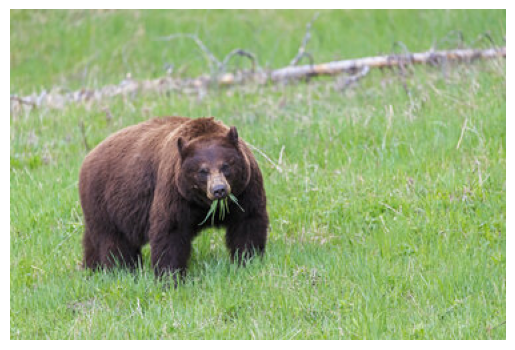

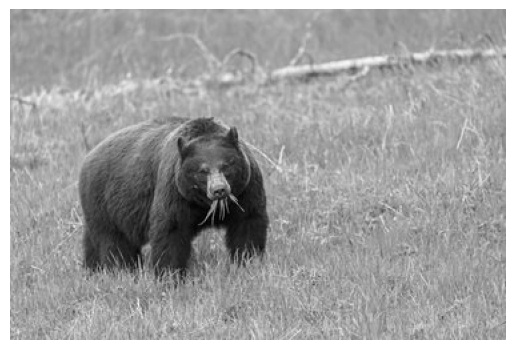

In [3]:
# 1. Deteccao por thresholds
im = cv2.imread('imgs/bear.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# ret, thresh = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)
ret, thresh = cv2.threshold(im_gray, 65, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 1) #, figsize=(4, 4))
ax.imshow(im)
ax.axis('off')
plt.plot()

fig, ax = plt.subplots(1, 1) #, figsize=(4, 4))
ax.imshow(im_gray, cmap='gray')
ax.axis('off')
plt.plot()

[]

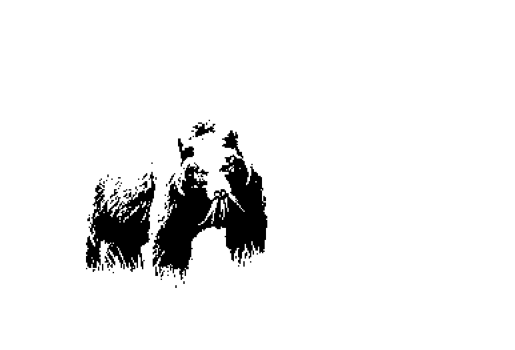

In [4]:
fig, ax = plt.subplots(1, 1) #, figsize=(10, 10))
ax.imshow(thresh, cmap='gray')
ax.axis('off')
plt.plot()

## Construindo a nossa própria Bounding Box

In [5]:
# Criamos um "sensor" de pixeis pretos
k = 83
x1 = (thresh == 0)[k, :].sum()
print(x1)

1


In [6]:
H, W = im_gray.shape

for k in range(H):
    if (thresh == 0)[k, :].sum() > 0:
        x1 = k
        break

for k in range(H):
    if (thresh == 0)[H - 1 - k, :].sum() > 0:
        x2 = H - 1 - k
        break

for k in range(W):
    if (thresh == 0)[:, k].sum() > 0:
        y1 = k
        break

for k in range(W):
    if (thresh == 0)[:, W - 1 - k].sum() > 0:
        y2 = W - 1 - k
        break

print(x1, x2, y1, y2)

83 208 57 192


In [7]:
im_bear = im.copy()
cv2.line(im_bear, (y1, x1), (y2, x1), color=(255, 0, 0), thickness=3)
cv2.line(im_bear, (y1, x2), (y2, x2), color=(255, 0, 0), thickness=3)
cv2.line(im_bear, (y1, x1), (y1, x2), color=(255, 0, 0), thickness=3)
cv2.line(im_bear, (y2, x1), (y2, x2), color=(255, 0, 0), thickness=3)

array([[[159, 174, 107],
        [160, 174, 113],
        [164, 177, 123],
        ...,
        [133, 172, 107],
        [126, 167, 101],
        [127, 169, 103]],

       [[160, 175, 106],
        [162, 177, 112],
        [165, 178, 122],
        ...,
        [130, 171, 103],
        [123, 166,  97],
        [121, 166,  97]],

       [[160, 177, 106],
        [162, 179, 111],
        [164, 180, 117],
        ...,
        [129, 172, 101],
        [120, 166,  94],
        [118, 165,  93]],

       ...,

       [[158, 185,  88],
        [125, 161,  53],
        [134, 170,  98],
        ...,
        [130, 175,  84],
        [141, 184, 102],
        [134, 176, 102]],

       [[137, 168,  75],
        [131, 170,  61],
        [150, 187, 120],
        ...,
        [148, 189, 110],
        [141, 182, 106],
        [145, 185, 112]],

       [[153, 182, 116],
        [156, 195, 106],
        [163, 201, 152],
        ...,
        [162, 199, 130],
        [147, 184, 114],
        [160, 198, 125]]

[]

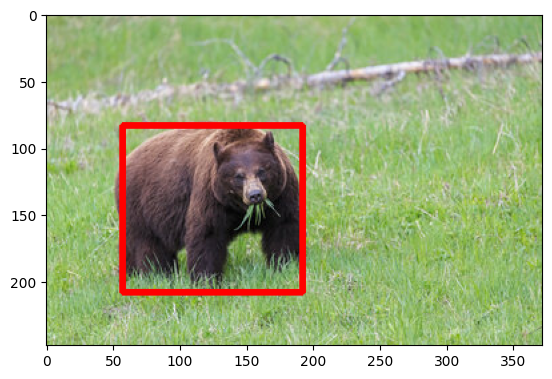

In [8]:
fig, ax = plt.subplots()
ax.imshow(im_bear)
plt.plot()

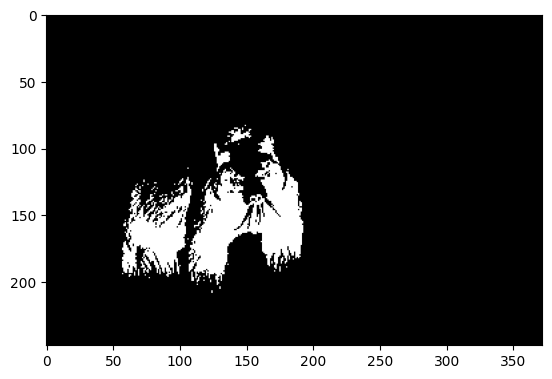

In [9]:
plt.figure()
plt.imshow(thresh == 0, cmap='gray')
plt.show()

In [10]:
im.shape, thresh.shape

((248, 372, 3), (248, 372))

In [11]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(248, 372), dtype=uint8)

## Segunda forma: Bounding Box usando OpenCV

[]

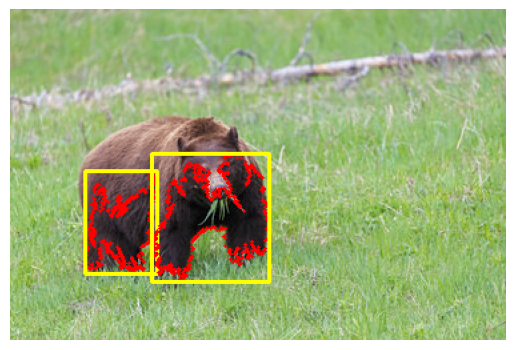

In [12]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

im_plot = im.copy()
for cnt in contours:
    if cv2.contourArea(cnt) > 550 and cv2.contourArea(cnt) < 30e3:
        cv2.drawContours(im_plot, cnt, -1, (255, 0, 0), 2)

        x1, y1, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(im_plot, (x1, y1), (x1 + w, y1 + h), (255, 255, 0), 2)

fig, ax = plt.subplots(1, 1) #, figsize=(4, 4))
ax.imshow(im_plot)
ax.axis('off')
plt.plot()

Uma forma de "corrigir" a duplicidade no resultado seria expandir os contornos para "preencher" os buracos na imagem!

[]

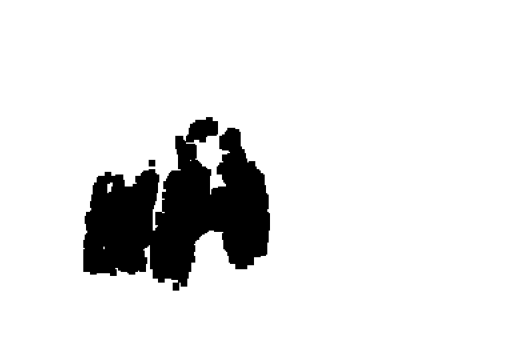

In [13]:
# Passo 1: Erosion
kernel = np.ones((5, 5), np.uint8) 
thresh_d = thresh.copy()
thresh_d = cv2.erode(thresh, kernel, iterations=1)

fig, ax = plt.subplots(1, 1) #, figsize=(4, 4))
ax.imshow(thresh_d, cmap='gray')
ax.axis('off')
plt.plot()

[]

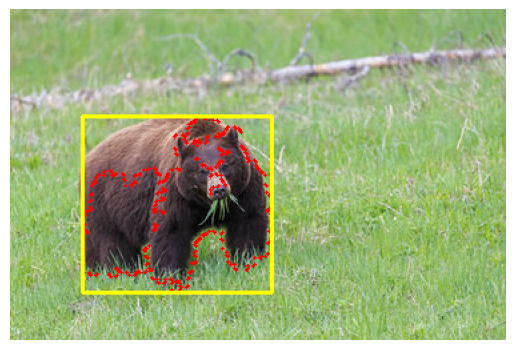

In [14]:
# Passo2: Usando a cv2.findContours
contours, hierarchy = cv2.findContours(thresh_d, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

im_plot = im.copy()
for cnt in contours:
    if cv2.contourArea(cnt) > 550 and cv2.contourArea(cnt) < 30e3:
        cv2.drawContours(im_plot, cnt, -1, (255, 0, 0), 2)

        x1, y1, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(im_plot, (x1, y1), (x1 + w, y1 + h), (255, 255, 0), 2)

fig, ax = plt.subplots(1, 1) #, figsize=(4, 4))
ax.imshow(im_plot)
ax.axis('off')
plt.plot()

## Deteccção em vídeos

In [15]:
#! curl -Lo "./videos/urso.mp4" "https://videos.pexels.com/video-files/857097/857097-sd_640_360_30fps.mp4"
#! curl -Lo "./videos/coelho.mp4" "https://videos.pexels.com/video-files/31761936/13531458_640_360_25fps.mp4"
#! curl -Lo "./videos/bird.mp4" "https://videos.pexels.com/video-files/16750931/16750931-sd_640_360_30fps.mp4"

In [16]:
import os
from IPython.core.display import Video
from IPython import display

#VIDEO_PATH = os.path.join('./videos', 'bird.mp4') # 25 fps
VIDEO_PATH = os.path.join('./videos', 'urso.mp4') # 25 fps


# Visualizando o vídeo
Video(VIDEO_PATH, width=600)

In [17]:
# non_max_suppression_fast - Malisiewicz et al.
# https://pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/
def nms(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    # initialize the list of picked indexes	
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    print(x1, y1, x2, y2)
    
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        print(overlap)
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
                                               np.where(overlap > overlapThresh)[0])))
    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


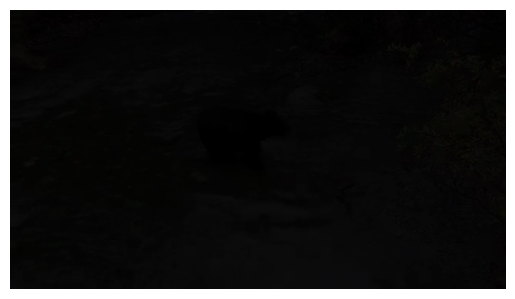

In [28]:
# Visualizando os frames
video = cv2.VideoCapture(VIDEO_PATH)

fig, ax  = plt.subplots()
ret = True
while ret:
    ret, frame = video.read()

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(frame_gray, 50, 255, cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # boxes = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 50e2 and cv2.contourArea(cnt) < 30e3: ## urso
        #if cv2.contourArea(cnt) > 550 and cv2.contourArea(cnt) < 30e3: ## passaro
            # da para mexer nos tamanhos da boxes para diferentes objetos aqui nesse if acima
               
            #print(cv2.contourArea(cnt))
            cv2.drawContours(frame, cnt, -1, (0, 255, 0), 2)
    
            x1, y1, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (255, 0, 255), 2)
            # boxes.append([x1, y1, x1 + w, y1 + h])
            
    # boxes = np.array(boxes)
    # boxes_nms = nms(boxes, 0.02)
    # print(boxes_nms)
    # x1, y1, x2, y2 = boxes_nms.reshape(-1)
    # cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 5)
    
    if ret:
        ax.clear()
        # ax.imshow(thresh, cmap='gray')
        ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        display.display(fig)
        # plt.pause(0.01)
        display.clear_output(wait=True)  # Clear the output to refresh the display
        last_valid_frame = frame.copy()

video.release()

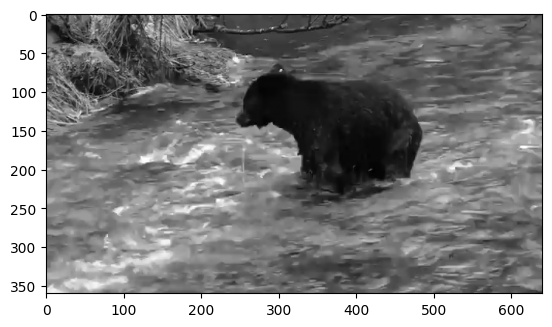

In [ ]:
video = cv2.VideoCapture(VIDEO_PATH)
ret, frame = video.read()
if ret:
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.plot()
video.release()

[]

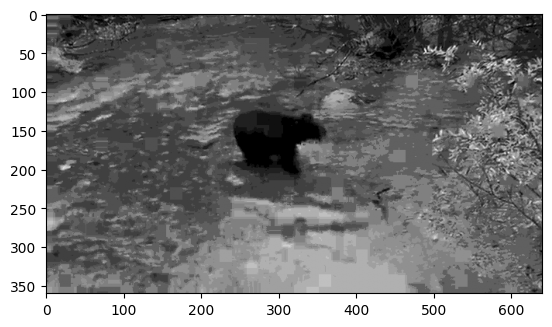

In [ ]:
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(last_valid_frame, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.plot()